In [194]:
import pandas as pd
import numpy as np
import surprise as sp
import time

In [195]:
df = pd.read_csv("data.csv",index_col='Unnamed: 0')
df.head()

,9,17,18,23,46,86,99,104,128,158,...,135244,135273,135280,135281,135286,135313,135335,135339,135341,135353
466,3,0,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1721,10,8,0,5,0,0,8,0,0,0,...,0,6,0,6,6,0,7,0,5,5
2393,8,0,0,0,0,0,8,0,0,0,...,0,3,0,4,0,0,0,0,0,2
2852,9,0,0,0,0,0,0,0,0,0,...,0,4,0,5,0,0,0,0,0,2
3248,5,10,0,0,0,0,0,0,0,6,...,0,2,0,0,0,1,0,0,0,2


In [196]:
def create_ratings_dict(df):
    ratings_dict = { 'itemID': [], 'userID': [], 'rating': [] }
    itemID = df.columns.values
    for row in df.index:
        for col, rate in enumerate((df.loc[row].values).tolist()):
            if rate != 0:
                ratings_dict["userID"].append(int(row))
                ratings_dict["itemID"].append(int(itemID[col]))
                ratings_dict["rating"].append(rate)
    return pd.DataFrame(ratings_dict)

In [197]:
rating_df = create_ratings_dict(df)

### Model Base Cross Validation Default

In [56]:
def surprise_model_base(df, s):
    #SVD input dataframe and s fold
    # output evaluation default setting
    sTime = time.time()
    reader = sp.Reader(rating_scale=(1, 10))
    data = sp.Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
    data.split(s)

    model = sp.SVD()
    # Evaluate performances of our algorithm on the dataset.
    perf = sp.evaluate(model, data, measures=['RMSE', 'MAE']) #root-mean-square-error, #mean-square-error
    #sp.print_perf(perf)
    print("Running Time: %s sec" % (time.time()-sTime))
    return perf

In [57]:
model_perf = surprise_model_base(rating_df, 5)

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 1.7261
MAE:  1.1563
------------
Fold 2
RMSE: 1.7218
MAE:  1.1524
------------
Fold 3
RMSE: 1.7527
MAE:  1.1706
------------
Fold 4
RMSE: 1.7429
MAE:  1.1752
------------
Fold 5
RMSE: 1.7419
MAE:  1.1694
------------
------------
Mean RMSE: 1.7371
Mean MAE : 1.1648
------------
------------
Running Time: 55.0980429649 sec


# Memory Base Cross Validation Default

In [58]:
def surprise_memory_base(df, s):
    #KNNBasic Input same as above default setting
    sTime = time.time()
    reader = sp.Reader(rating_scale=(1, 10))
    data = sp.Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
    data.split(s)

    model = sp.KNNBasic()

    # Evaluate performances of our algorithm on the dataset.
    perf = sp.evaluate(model, data, measures=['RMSE', 'MAE']) #root-mean-square-error, #mean-square-error
    #sp.print_perf(perf)
    print("Running Time: %s sec" % (time.time()-sTime))
    return perf

In [59]:
mem_perf = surprise_memory_base(rating_df, 5)

Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.3327
MAE:  1.7892
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.3245
MAE:  1.7845
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.3437
MAE:  1.7976
------------
Fold 4
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.3246
MAE:  1.7883
------------
Fold 5
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.3429
MAE:  1.7972
------------
------------
Mean RMSE: 2.3337
Mean MAE : 1.7914
------------
------------
Running Time: 10.2189898491 sec


### We can see that Nearest Neighbor memory base algorithm has wrose performance, comparing to SVD model base algorithm. Whereas Nearest Neighbor model computes 5 times faster than SVD.


# Hyper Parameter Model Base

In [60]:
def surprise_model_base_hyparam(df, k = 5, hyper_param):
    # k fold, hyper param for grid search
    # add time in each gridsearch SVD.? available? from library?
#    sTime = time.time()
    reader = sp.Reader(rating_scale=(1, 10))
    data = sp.Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
    data.split(k)
    

    grid_search = sp.GridSearch(sp.SVD, hyper_param, measures=['RMSE', 'MAE'])
    grid_search.evaluate(data)
#    print("Running Time: %s sec" % (time.time()-sTime))
    return grid_search

In [145]:
def surprise_model_base_0(df, s, hyparam):
    reader = sp.Reader(rating_scale=(1, 10))
    data = sp.Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
    data.split(s)
    
    result = dict()
    for nf in hyparam:
        print("%s :" % nf)
        sTime = time.time()
        model = sp.SVD(n_factors=nf)
        perf = sp.evaluate(model, data, measures=['RMSE', 'MAE'])
        #sp.print_perf(perf)
        #print("Running Time: %s sec" % (time.time()-sTime))
        result[str(nf)] = [perf, (time.time()-sTime)]
    return result

In [146]:
# decide to change for time calc. only
hyper_param =[1,2,5,8,10,15,20,30,50,100]
model_perf_hyparam1 = surprise_model_base_0(rating_df, 5, hyper_param)

1 :
Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 1.7762
MAE:  1.1753
------------
Fold 2
RMSE: 1.7899
MAE:  1.1937
------------
Fold 3
RMSE: 1.7935
MAE:  1.1880
------------
Fold 4
RMSE: 1.8043
MAE:  1.1937
------------
Fold 5
RMSE: 1.7601
MAE:  1.1662
------------
------------
Mean RMSE: 1.7848
Mean MAE : 1.1834
------------
------------
2 :
Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 1.7665
MAE:  1.1628
------------
Fold 2
RMSE: 1.7779
MAE:  1.1592
------------
Fold 3
RMSE: 1.8020
MAE:  1.1757
------------
Fold 4
RMSE: 1.7992
MAE:  1.1821
------------
Fold 5
RMSE: 1.7657
MAE:  1.1537
------------
------------
Mean RMSE: 1.7823
Mean MAE : 1.1667
------------
------------
5 :
Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 1.8202
MAE:  1.1964
------------
Fold 2
RMSE: 1.7978
MAE:  1.1767
------------
Fold 3
RMSE: 1.8038
MAE:  1.1831
------------
Fold 4
RMSE: 1.8194
MAE:  1.1937
------------
Fold 5
RMSE: 1.7958
MAE:  1.1693
--

In [165]:
# get time from dic array of time
calctime = []
for nf in hyper_param:
    calctime.append(model_perf_hyparam1[str(nf)][1])
    print("n_factors: " + str(nf) + " time: "+ str(model_perf_hyparam1[str(nf)][1]) + '\n' )

n_factors: 1 time: 14.3396508694

n_factors: 2 time: 14.3498718739

n_factors: 5 time: 15.4360690117

n_factors: 8 time: 16.8306071758

n_factors: 10 time: 19.2547791004

n_factors: 15 time: 19.399338007

n_factors: 20 time: 20.4937448502

n_factors: 30 time: 24.0927510262

n_factors: 50 time: 31.8436329365

n_factors: 100 time: 49.4179859161



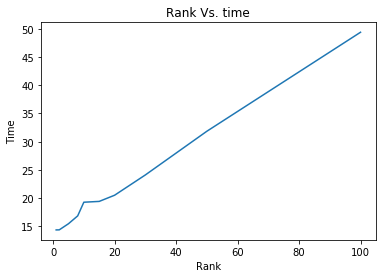

In [167]:
# generalize to min and max 
import matplotlib.pyplot as plt
plt.plot(hyper_param, calctime)
#plt.axis([0, 100, 1.14, 1.22])
plt.xlabel('Rank')
plt.ylabel('Time')
plt.title('Rank Vs. time')
plt.show()

### Time increase linearity with number of rank increases. This makes sense because the more latent factors are included in matrix factorization, the more computation time is needed during U,V recontruction. 

In [62]:
def format_model_df(df):
    df = pd.DataFrame.from_dict(df.cv_results)
    new_col = {"params": "n_factors"}
    df = df.drop("scores",axis=1)
    for row in df.iterrows():
        df.loc[row[0], "params"] = row[1]["params"]["n_factors"]
    df = df.rename(columns = new_col)
    return df

In [63]:
hyper_param = {'n_factors': [1,2,5,8,10,15,20,30,50,100]}
model_perf_hyparam = surprise_model_base_hyparam(rating_df, 5, hyper_param)

[{'n_factors': 1}, {'n_factors': 2}, {'n_factors': 5}, {'n_factors': 8}, {'n_factors': 10}, {'n_factors': 15}, {'n_factors': 20}, {'n_factors': 30}, {'n_factors': 50}, {'n_factors': 100}]
------------
Parameters combination 1 of 10
params:  {'n_factors': 1}
------------
Mean RMSE: 1.7815
Mean MAE : 1.1833
------------
------------
Parameters combination 2 of 10
params:  {'n_factors': 2}
------------
Mean RMSE: 1.7951
Mean MAE : 1.1832
------------
------------
Parameters combination 3 of 10
params:  {'n_factors': 5}
------------
Mean RMSE: 1.8009
Mean MAE : 1.1795
------------
------------
Parameters combination 4 of 10
params:  {'n_factors': 8}
------------
Mean RMSE: 1.8009
Mean MAE : 1.1825
------------
------------
Parameters combination 5 of 10
params:  {'n_factors': 10}
------------
Mean RMSE: 1.7950
Mean MAE : 1.1802
------------
------------
Parameters combination 6 of 10
params:  {'n_factors': 15}
------------
Mean RMSE: 1.7904
Mean MAE : 1.1822
------------
------------
Param

In [64]:
model_df_hyparam = format_model_df(model_perf_hyparam)
model_df_hyparam

,MAE,n_factors,n_factors
0,1.183297,1,1
1,1.183234,2,2
2,1.179474,5,5
3,1.182542,8,8
4,1.180186,10,10
5,1.182174,15,15
6,1.177190,20,20
7,1.170467,30,30
8,1.168396,50,50
9,1.163797,100,100


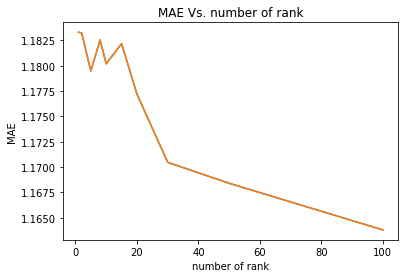

In [183]:
# generalize to min and max 
import matplotlib.pyplot as plt
plt.plot(model_df_hyparam["n_factors"].values.tolist(), model_df_hyparam["MAE"].values.tolist())
#plt.axis([0, 100, 1.14, 1.22])
plt.xlabel('number of rank')
plt.ylabel('MAE')
plt.title('MAE Vs. number of rank')

plt.show()

In [73]:
model_perf_hyparam.best_params.values()

[{'n_factors': 100}, {'n_factors': 100}]

### The more rank included in matrix reconstruction R = UV , the more accuracy we attain for SVD, at the cost of computation time.
### Since input data size is relatively small, calculation of SVD with rank = 100 can be done in 50 sec. We choose parameter is rank = 100 to attain lowest MAE for further testing. However, it would no longer be applicable, when our input size is large.

# Hyper Parameter Memory Base 

In [74]:
def surprise_memory_base_hyparam(df, s, hyper_param):
    sTime = time.time()
    reader = sp.Reader(rating_scale=(1, 10))
    data = sp.Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
    data.split(s)

    grid_search = sp.GridSearch(sp.KNNBasic, hyper_param, measures=['RMSE', 'MAE'])
    grid_search.evaluate(data)
    print("Running Time: %s sec" % (time.time()-sTime))
    return grid_search

In [184]:
def memory_base_tune(df, k):
    #KNNBasic Input same as above default setting
    sTime = time.time()
    reader = sp.Reader(rating_scale=(1, 10))
    data = sp.Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
    data.split(5)
    model = sp.KNNBasic(k = k)
    # Evaluate performances of our algorithm on the dataset.
    perf = sp.evaluate(model, data, measures=['RMSE', 'MAE']) #root-mean-square-error, #mean-square-error
    #sp.print_perf(perf)
    print("Running Time: %s sec" % (time.time()-sTime))
    return perf

In [75]:
def format_mem_df(df):
    df = pd.DataFrame.from_dict(df.cv_results)
    new_col = {"scores": "RMSE"}
    df = df.drop("params",axis=1)
    for row in df.iterrows():
        df.loc[row[0], "scores"] = row[1]["scores"]["RMSE"]
    df = df.rename(columns = new_col)
    return df

In [76]:
hyper_param = {'k': [1,2,5,8,10,15,20,30,50,100]}
mem_perf_hyparam = surprise_memory_base_hyparam(rating_df, 10, hyper_param)
# with 10 fold. hyper_para. dic.

[{'k': 1}, {'k': 2}, {'k': 5}, {'k': 8}, {'k': 10}, {'k': 15}, {'k': 20}, {'k': 30}, {'k': 50}, {'k': 100}]
------------
Parameters combination 1 of 10
params:  {'k': 1}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 2.1857
Mean MAE : 1.4142
------------
------------
Parameters combination 2 

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 2.3020
Mean MAE : 1.7701
------------
Running Time: 134.328701019 sec


In [80]:
mem_hyparam_df = format_mem_df(mem_perf_hyparam)
mem_hyparam_df
# output hyper param.

,MAE,k,RMSE
0,1.414221,1,2.1857
1,1.381972,2,2.04237
2,1.461870,5,2.04097
3,1.548849,8,2.10685
4,1.597334,10,2.14906
5,1.677612,15,2.22003
6,1.721239,20,2.25855
7,1.758892,30,2.29152
8,1.769887,50,2.30184
9,1.770113,100,2.30204


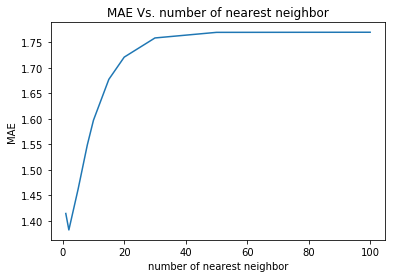

In [182]:
#as function
plt.plot(mem_hyparam_df["k"].values.tolist(), mem_hyparam_df["MAE"].values.tolist())
#plt.axis([0, 100, 1.14, 1.22])
plt.xlabel('number of nearest neighbor')
plt.ylabel('MAE')
plt.title('MAE Vs. number of nearest neighbor')
plt.show()

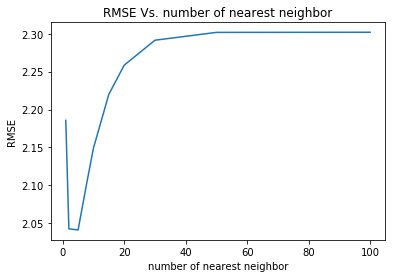

In [168]:

plt.plot(mem_hyparam_df["k"].values.tolist(), mem_hyparam_df["RMSE"].values.tolist())
#plt.axis([0, 100, 1.14, 1.22])
plt.xlabel('number of nearest neighbor')
plt.ylabel('RMSE')
plt.title('RMSE Vs. number of nearest neighbor')
plt.show()

In [87]:
mem_perf_hyparam.best_params.values()

[{'k': 2}, {'k': 5}]

### For both MAE and RMSE, as the number of nearest neighbors included in KNN increase, the accuracy improved at first and then fastly dropped after neighbors > 5.
### Best parameter nearest neighbors = 5 or 2. For computation simplicity, we choose nearest neighbors = 2, for future testing.

In [154]:
def surprise_mem_base(df, s, hyparam):
    reader = sp.Reader(rating_scale=(1, 10))
    data = sp.Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
    data.split(s)
    
    result = dict()
    for nf in hyparam:
        print("%s :" % nf)
        sTime = time.time()
        model = sp.KNNBasic(k=nf)
        perf = sp.evaluate(model, data, measures=['RMSE', 'MAE'])
        #sp.print_perf(perf)
        #print("Running Time: %s sec" % (time.time()-sTime))
        result[str(nf)] = [perf, (time.time()-sTime)]
    return result

In [155]:
# decide to change for time calc. only
hyper_param =[1,2,5,8,10,15,20,30,50,100]
mem_perf_hyparam1 = surprise_mem_base(rating_df, 5, hyper_param)
# get time from dic
# array of time


1 :
Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.2390
MAE:  1.4634
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.2086
MAE:  1.4404
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.2416
MAE:  1.4530
------------
Fold 4
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.2217
MAE:  1.4379
------------
Fold 5
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.2297
MAE:  1.4518
------------
------------
Mean RMSE: 2.2281
Mean MAE : 1.4493
------------
------------
2 :
Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.0840
MAE:  1.4203
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2

In [160]:
calctime_mem = []
for nf in hyper_param:
    calctime_mem.append(mem_perf_hyparam1[str(nf)][1])
    print("k: " + str(nf) + " time: "+ str(mem_perf_hyparam1[str(nf)][1]) + '\n' )
# graph
# potential of using rmse? to add penalty to outlier
# generalize to min and max 


k: 1 time: 7.23237109184

k: 2 time: 8.14156103134

k: 5 time: 8.5548119545

k: 8 time: 8.90330505371

k: 10 time: 9.89839887619

k: 15 time: 9.02156114578

k: 20 time: 9.21346211433

k: 30 time: 8.90022015572

k: 50 time: 8.46241807938

k: 100 time: 8.5784740448



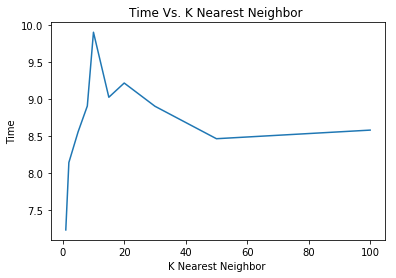

In [169]:
import matplotlib.pyplot as plt
plt.plot(hyper_param, calctime_mem)
#plt.axis([0, 100, 1.14, 1.22])
plt.xlabel('K Nearest Neighbor ')
plt.ylabel('Time')
plt.title('Time Vs. K Nearest Neighbor ')

plt.show()

### Time of computing Nearest Neighbor increases with number of neighbor involved in calculation untill k = 10, then time needed for calculation decreases.

# Change Size of Input

In [88]:
import random as rd
def change_size(df, row_size, col_size):
    if row_size > df.shape[0] or col_size > df.shape[1]:
        print("Wished Size Exceed ERROR")
        return
    row_index = df.index.values.tolist()
    col_index = df.columns.values.tolist()
    rd.shuffle(row_index)
    rd.shuffle(col_index)
    row_index = row_index[:row_size]
    col_index = col_index[:col_size]
    return df[col_index].loc[row_index]

In [111]:
df_2550=change_size(df,25,50)
#df_2510=change_size(df,50,100)
df_5025=change_size(df,50,2500)
#df_1025=change_size(df,100,2500)
df_1050=change_size(df,100,5000)

In [112]:
rating_df_2550 = create_ratings_dict(df_2550)
rating_df_5025 = create_ratings_dict(df_5025)
rating_df_1050 = create_ratings_dict(df_1050)

In [113]:
rating_size = [rating_df_2550,rating_df_5025,rating_df_1050]

In [114]:
def memory_base(df, s):
    #KNNBasic Input same as above default setting
    sTime = time.time()
    reader = sp.Reader(rating_scale=(1, 10))
    data = sp.Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
    data.split(s)

    model = sp.KNNBasic(k=20)

    # Evaluate performances of our algorithm on the dataset.
    perf = sp.evaluate(model, data, measures=['RMSE', 'MAE']) #root-mean-square-error, #mean-square-error
    #sp.print_perf(perf)
    print("Running Time: %s sec" % (time.time()-sTime))
    return perf

In [120]:
memo_perf_size2550 = memory_base(rating_df_2550,5)

Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.8831
MAE:  2.9994
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.7796
MAE:  2.7222
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.6963
MAE:  3.0353
------------
Fold 4
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 4.0923
MAE:  3.2853
------------
Fold 5
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.3956
MAE:  2.5121
------------
------------
Mean RMSE: 3.7694
Mean MAE : 2.9109
------------
------------
Running Time: 0.0289800167084 sec


In [121]:
memo_perf_size5025 = memory_base(rating_df_5025,5)

Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.5743
MAE:  1.9182
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.5508
MAE:  1.8974
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.5810
MAE:  1.9360
------------
Fold 4
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.5271
MAE:  1.8987
------------
Fold 5
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.5352
MAE:  1.9025
------------
------------
Mean RMSE: 2.5537
Mean MAE : 1.9106
------------
------------
Running Time: 1.11919593811 sec


In [122]:
memo_perf_size1050 = memory_base(rating_df_1050,5)

Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.3404
MAE:  1.7866
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.3068
MAE:  1.7581
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.2925
MAE:  1.7525
------------
Fold 4
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.3047
MAE:  1.7534
------------
Fold 5
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.2800
MAE:  1.7390
------------
------------
Mean RMSE: 2.3049
Mean MAE : 1.7579
------------
------------
Running Time: 4.92304086685 sec


In [126]:
def model_base(df, s):
    #SVD input dataframe and s fold
    # output evaluation default setting
    sTime = time.time()
    reader = sp.Reader(rating_scale=(1, 10))
    data = sp.Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
    data.split(s)

    model = sp.SVD(n_factors = 100)
    # Evaluate performances of our algorithm on the dataset.
    perf = sp.evaluate(model, data, measures=['RMSE', 'MAE']) #root-mean-square-error, #mean-square-error
    #sp.print_perf(perf)
    print("Running Time: %s sec" % (time.time()-sTime))
    return perf

In [127]:
mod_perf_size2550 = model_base(rating_df_2550,5)

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 2.5632
MAE:  2.1488
------------
Fold 2
RMSE: 2.4631
MAE:  1.9191
------------
Fold 3
RMSE: 2.6283
MAE:  2.3057
------------
Fold 4
RMSE: 2.7571
MAE:  2.1850
------------
Fold 5
RMSE: 2.4055
MAE:  1.9758
------------
------------
Mean RMSE: 2.5634
Mean MAE : 2.1069
------------
------------
Running Time: 0.072597026825 sec


In [128]:
mod_perf_size5025 = model_base(rating_df_5025,5)

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 1.8101
MAE:  1.2116
------------
Fold 2
RMSE: 1.7844
MAE:  1.1872
------------
Fold 3
RMSE: 1.7630
MAE:  1.1936
------------
Fold 4
RMSE: 1.7641
MAE:  1.1930
------------
Fold 5
RMSE: 1.7259
MAE:  1.1825
------------
------------
Mean RMSE: 1.7695
Mean MAE : 1.1936
------------
------------
Running Time: 6.51978492737 sec


In [129]:
mod_perf_size1050 = model_base(rating_df_1050,5)

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 1.7187
MAE:  1.1595
------------
Fold 2
RMSE: 1.7417
MAE:  1.1698
------------
Fold 3
RMSE: 1.7595
MAE:  1.1878
------------
Fold 4
RMSE: 1.7569
MAE:  1.1761
------------
Fold 5
RMSE: 1.7539
MAE:  1.1724
------------
------------
Mean RMSE: 1.7461
Mean MAE : 1.1731
------------
------------
Running Time: 24.5025980473 sec


## We can see clearly that in both memory based  and model based,  calculation time increase with the size of input, also the accuary increase with larger input.


## Evaluate Different Versions of KNN Algorithm

In [176]:
def surprise_memory(df, s):
    #KNNBasic Input same as above default setting
    
    reader = sp.Reader(rating_scale=(1, 10))
    data = sp.Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
    data.split(s)
    sTime = time.time()
    model1 = sp.KNNWithMeans()


    # Evaluate performances of our algorithm on the dataset.
    perf1 = sp.evaluate(model1, data, measures=['RMSE', 'MAE']) #root-mean-square-error, #mean-square-error
    mTime = time.time()
    
    model2 = sp.KNNWithZScore()
    perf2 = sp.evaluate(model2, data, measures=['RMSE', 'MAE'])
    eTime = time.time()
    
    time1 = mTime - sTime
    time2 = eTime - mTime
    #sp.print_perf(perf)
    print("Running Time: %s sec" % (time.time()-sTime))
    return perf1, perf2, time1, time2


In [177]:
mem_perf_tune = surprise_memory(rating_df, 5)

Evaluating RMSE, MAE of algorithm KNNWithMeans.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.7481
MAE:  1.1659
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.7542
MAE:  1.1670
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.7305
MAE:  1.1567
------------
Fold 4
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.7380
MAE:  1.1545
------------
Fold 5
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.7632
MAE:  1.1742
------------
------------
Mean RMSE: 1.7468
Mean MAE : 1.1637
------------
------------
Evaluating RMSE, MAE of algorithm KNNWithZScore.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.7425
MAE:  1.1228
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 

In [178]:
mem_perf_tune

(CaseInsensitiveDefaultDict(list,
                            {'mae': [1.1658773520695522,
                              1.1670455393230796,
                              1.1567363345718236,
                              1.1544982747677421,
                              1.1741501129802083],
                             'rmse': [1.7480654904786195,
                              1.7541529934956335,
                              1.7304823293250673,
                              1.7379888750163777,
                              1.7632012634536158]}),
 CaseInsensitiveDefaultDict(list,
                            {'mae': [1.1228437728096936,
                              1.1219691535630305,
                              1.1118216549771267,
                              1.1146401971857773,
                              1.1301761402753745],
                             'rmse': [1.7425360826254708,
                              1.7484677584746109,
                              1.724176554683951

KNNBasic 
Mean RMSE: 2.3337
Mean MAE : 1.7914

KNN with Mean
Mean RMSE: 1.7468
Mean MAE : 1.1637
Time: 9.33

KNNWithZScore
Mean RMSE: 1.7406
Mean MAE : 1.1203
Time: 10.98

##### We observed an  improvement of accuracy with modified versions of KNN algorithm. Therefore we use KNNWithZScore for Precision Recall evaluation.


## Coverage Evaluation

In [210]:
from collections import defaultdict
from surprise import Dataset
from surprise import SVD


def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

def calculateCoverage_model_base(df, s):
    reader = sp.Reader(rating_scale=(1, 10))
    data = sp.Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
    data.split(s)

    model = sp.SVD()

    for trainset, testset in data.folds():
        model.train(trainset)
        predictions = model.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=9)

        # Precision and recall can then be averaged over all users
        precision = float(sum(prec for prec in precisions.values())) / len(precisions)
        recall = float(sum(rec for rec in recalls.values())) / len(recalls)
        print 'Precision,Recall: '+ str(precision) + ','+ str(recall)
        
def calculateCoverage_memory_base(df, s):
    reader = sp.Reader(rating_scale=(1, 10))
    data = sp.Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
    data.split(s)

    model = sp.KNNWithZScore()

    for trainset, testset in data.folds():
        model.train(trainset)
        predictions = model.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=9)

        # Precision and recall can then be averaged over all users
        precision = float(sum(prec for prec in precisions.values())) / len(precisions)
        #recall = float(sum(rec for rec in recalls.values())) / len(recalls)
        recall = float(sum(rec for rec in recalls.values())) / len(recalls)
        print 'Precision,Recall: '+ str(precision) + ','+ str(recall)

In [211]:
calculateCoverage_model_base(rating_df, 5)

Precision,Recall: 0.82,0.04
Precision,Recall: 0.81,0.03
Precision,Recall: 0.8,0.04
Precision,Recall: 0.82,0.04
Precision,Recall: 0.81,0.04


In [212]:
calculateCoverage_memory_base(rating_df, 5)

Computing the msd similarity matrix...
Done computing similarity matrix.
Precision,Recall: 0.68,0.03
Computing the msd similarity matrix...
Done computing similarity matrix.
Precision,Recall: 0.68,0.04
Computing the msd similarity matrix...
Done computing similarity matrix.
Precision,Recall: 0.7,0.02
Computing the msd similarity matrix...
Done computing similarity matrix.
Precision,Recall: 0.71,0.05
Computing the msd similarity matrix...
Done computing similarity matrix.
Precision,Recall: 0.69,0.04


#### Precision Recall are defined as follows. Female user is defined to be relevant if the true rating is greater than 8. And the function above will recommend if the estimated rating is greater than 8 and it is within top 10 estimated ratings.
#### Here we can see SVD has precision of 81%, that is about 81% of top 10 recommendation is of users' interests; recall 4%, which is among all relevant, 4 % is selected. Whereas KNN with Z score has lower precision of 69%, that is about 69% of top 10 recommendation is of users' interests; recall 4%, which is among all relevant, 4% is selected.
#### The low recall rates in both models might be improved through changing to more complex algorithms. It will be the aspect we need to inhance in the final project.